In [1]:
#손글씨를 분류해보기
# 1. 필요한 모듈 import 하기
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [22]:
digits = load_digits() 
#load_digits() 함수를 사용해 데이터를 가져온다.

In [12]:
print(type(dir(digits)))


<class 'list'>


In [23]:
digits.keys()
#키를 출력해본다.

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [24]:
digits_data = digits['data']
#데이터를 따로 변수에 담아준다.

In [25]:
print(digits_data.shape)
#데이터의 형태를 본다. 1797개이고 64개의 속성을 가지고 있다.

(1797, 64)


In [26]:
digits_data[0]
#출력을 해보니  64개의 숫자로 이루어진 배열이다

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

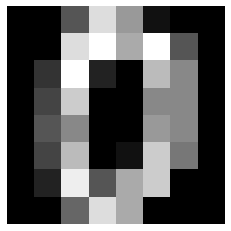

In [30]:
#어떻게 생겼나 확인해 보자
import matplotlib.pyplot as plt
%matplotlib inline 
#역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것

plt.imshow(digits.data[0].reshape(8,8), cmap='gray') 
#일렬로 펴진 64개 데이터를 8, 8 reshape
plt.axis('off')
plt.show()

#0처럼 생긴 이미지가 보인다.

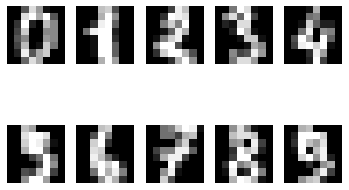

In [32]:
#여러개의 이미지를 한번에 확인해보자.
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(digits.data[i].reshape(8,8), cmap='gray')
  plt.axis('off')
plt.show()

#0~9까지 숫자가 출력됨

In [37]:
print(digits.target_names)
#타겟네임, 즉 y(정답)를 출력해보니 0~9까지의 숫자다

[0 1 2 3 4 5 6 7 8 9]


In [39]:
#target 데이터를 확인
#라벨로 지정 (y, 답).
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]
#타겟을 가져와서 변수에 넣고 쉐잎을 출력해보니 1797개의 데이터란다.
#이 타겟을 넣은 변수를 처음부터 20개를 찍어보니 0~19 
#0~9 , 0~9이렇게 나온다.

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#DESCR 에는 데이터셋의 설명이 담겨있다 한번 보자
print(digits.DESCR)

In [71]:
#digits_data와 digits_label (문제와 답)으로 모델을 학습하고 정확도를 확인해 본다.
#데이터를 학습용 문제, 정답/ 검증용, 문제,정답 으로 나눈다 
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=3)

#디시전트리분류, 정확도점수 임포트
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#DecisionTree를 사용
decision_tree = DecisionTreeClassifier(random_state=3) #빈 모델을 만들고
decision_tree.fit(X_train, y_train) #학습용 문제지와 정답을 주고 핏
y_pred = decision_tree.predict(X_test) #검증용 문제지를 넣고 예측답안을 만듬.

accuracy = accuracy_score(y_test, y_pred) #실제 답안과, 예측 답안을 넣고 비교
accuracy

#정확도는 86퍼가 나왔다.

0.8666666666666667

In [72]:
#각 지표를 한번에 확인해 본다

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        47
           1       0.83      0.86      0.85        35
           2       0.81      0.84      0.83        31
           3       0.84      0.90      0.87        40
           4       0.90      0.82      0.86        44
           5       0.91      0.79      0.85        38
           6       0.85      0.92      0.88        25
           7       0.91      0.93      0.92        42
           8       0.86      0.83      0.84        29
           9       0.75      0.83      0.79        29

    accuracy                           0.87       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.87      0.87      0.87       360



In [56]:
#랜덤포레스트 사용해보기.
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(
    digits_data,
    digits_label,
    test_size=0.2,
    random_state=3
)

random_forest = RandomForestClassifier(random_state=3)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy
#정확도는 96퍼가 나왔다.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        31
           3       1.00      0.95      0.97        40
           4       0.98      0.95      0.97        44
           5       0.97      0.89      0.93        38
           6       1.00      0.96      0.98        25
           7       0.93      1.00      0.97        42
           8       0.88      0.97      0.92        29
           9       0.90      0.93      0.92        29

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.96       360
weighted avg       0.97      0.97      0.97       360



0.9666666666666667

In [57]:
#서포트 백터 머신을 사용해보자.
from sklearn import svm

svm_model = svm.SVC()
print(svm_model._estimator_type)


classifier


In [59]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy
#99퍼센트!

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        40
           4       1.00      0.98      0.99        44
           5       1.00      0.97      0.99        38
           6       1.00      1.00      1.00        25
           7       0.98      1.00      0.99        42
           8       0.97      1.00      0.98        29
           9       0.97      0.97      0.97        29

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



0.9916666666666667

In [60]:
#SGD Classifier 모델을 사용
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
print(sgd_model._estimator_type)



classifier


In [62]:
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
accuracy
#정확도는 94

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.92      0.94      0.93        35
           2       1.00      1.00      1.00        31
           3       0.98      1.00      0.99        40
           4       1.00      0.89      0.94        44
           5       0.97      0.89      0.93        38
           6       0.96      0.96      0.96        25
           7       0.93      1.00      0.97        42
           8       0.80      0.97      0.88        29
           9       0.92      0.83      0.87        29

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



0.95

In [65]:
#Logistic Regression을 사용
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
print(logistic_model._estimator_type)

classifier


In [68]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracy
#95퍼


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9527777777777777

Accuracy : 전체 대비 정확하게 예측한 개수의 비율


Precision : Positive라고 예측한 것 중에서 얼마나 잘 맞았는지 비율


Recall : 실제 Positive한 것 중에서 얼마나 잘 예측하였는지 비율


F1 score : 두 지표를 평균값을 통해 하나의 값으로 나타내는 방법

f1 스코어로는 확인이 어렵다 
0~9까지 총 10개의 숫자를 분류 하는것이기 때문에 전체 데이터 대비 정확하게 예측한 확율이 높은 Accuracy를 선택, 
svm이 가장 높은 정확도를 기록